In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd

import os

import itertools

In [3]:
files = [x for x in os.listdir('data') if not x.startswith('.git')]
li = []

for i, file in enumerate(files):
    with open('data/' + file, 'r') as f:
        df = pd.read_csv(f, delimiter=' ', header=None,
                         names=['num_a', 'num_b', 'num_aces_a', 'num_aces_b', 
                                'num_kings_a', 'num_kings_b', 'win_first_round', 'wars'],
                         na_values='None')
        df['game'] = i
        
        li.append(df)

df = pd.concat(li, axis=0, ignore_index=True)

In [4]:
df['game'] = pd.to_numeric(df['game'])

In [5]:
df.head()

,num_a,num_b,num_aces_a,num_aces_b,num_kings_a,num_kings_b,win_first_round,wars,game
0,26,26,1,3,3,1,NaN,0,0
1,25,27,1,3,3,1,NaN,0,0
2,26,26,1,3,3,1,NaN,0,0
3,25,27,1,3,3,1,NaN,0,0
4,26,26,1,3,3,1,NaN,0,0


### Data Prep

Make columns of winners

In [6]:
results = df.groupby('game').last().apply(lambda x: x['num_a'] > x['num_b'], axis=1).to_frame('result')
df = df.merge(results, left_on='game', right_index=True)

Make column of starting aces for player a

In [7]:
starting_aces = df.groupby('game').first().apply(lambda x: x['num_aces_a'], axis=1).to_frame('starting_ace_count')
df = df.merge(starting_aces, left_on='game', right_index=True)

In [8]:
starting_kings = df.groupby('game').first().apply(lambda x: x['num_kings_a'], axis=1).to_frame('starting_king_count')
df = df.merge(starting_kings, left_on='game', right_index=True)

In [9]:
won_first_round = df.groupby('game')['win_first_round'].max().to_frame('a_won_first_round')
df = df.merge(won_first_round, left_on='game', right_index=True)
df.drop('win_first_round', axis=1, inplace=True)

## See Data

In [10]:
df.head()

,num_a,num_b,num_aces_a,num_aces_b,num_kings_a,num_kings_b,wars,game,result,starting_ace_count,starting_king_count,a_won_first_round
0,26,26,1,3,3,1,0,0,False,1,3,False
1,25,27,1,3,3,1,0,0,False,1,3,False
2,26,26,1,3,3,1,0,0,False,1,3,False
3,25,27,1,3,3,1,0,0,False,1,3,False
4,26,26,1,3,3,1,0,0,False,1,3,False


## Plots

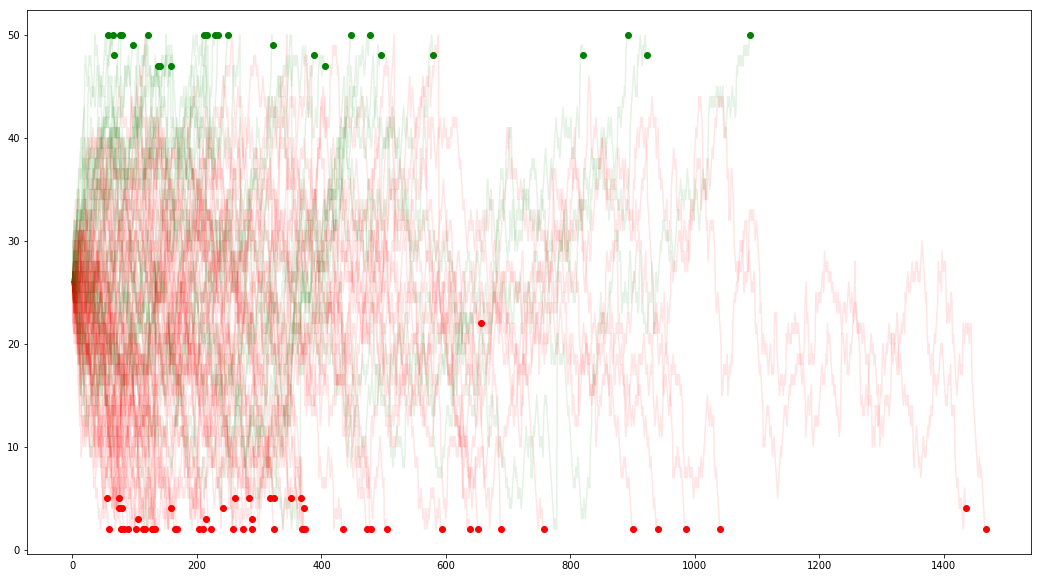

In [11]:
fig, ax = plt.subplots(figsize=(18, 10))

color_dict = {True: 'g', False: 'r'}

gb = df.groupby('game')
for name, group in itertools.islice(gb, 100):
    num_turns = len(group)
    last_turn = group.tail(1)
    result = group['result'].iloc[0]
    
    ax.plot(range(num_turns), group['num_a'], color=color_dict[result], alpha=.1)
    ax.plot(num_turns, last_turn['num_a'], color=color_dict[result], marker='o')

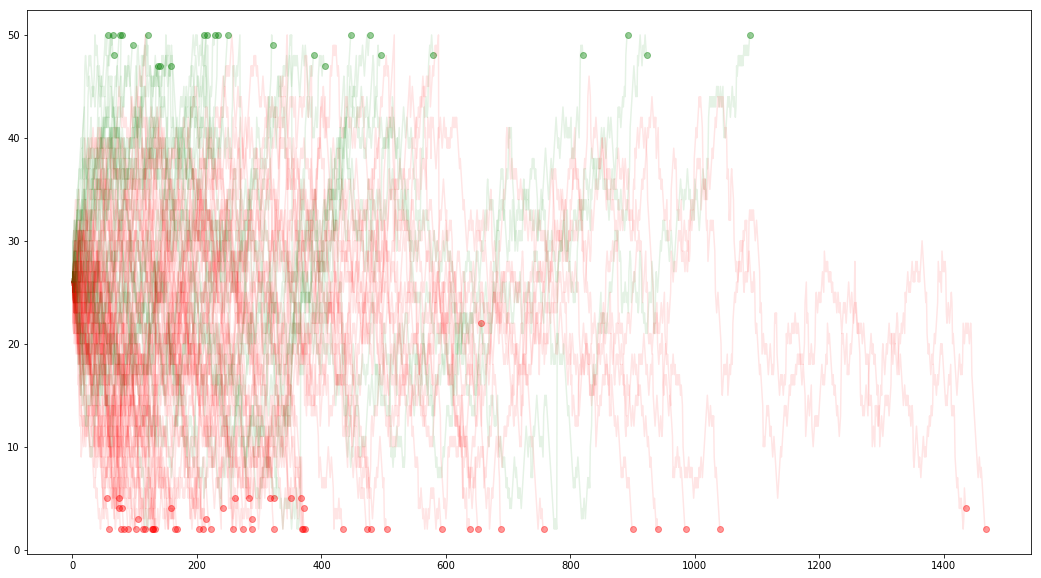

In [12]:
fig, ax = plt.subplots(figsize=(18, 10))

color_dict = {True: 'g', False: 'r'}

gb = df.groupby('game')
for name, group in itertools.islice(gb, 500):
    num_turns = len(group)
    last_turn = group.tail(1)
    result = group['result'].iloc[0]
    
    ax.plot(range(num_turns), group['num_a'], color=color_dict[result], alpha=.1)
    ax.plot(num_turns, last_turn['num_a'], color=color_dict[result], marker='o', alpha=.4)

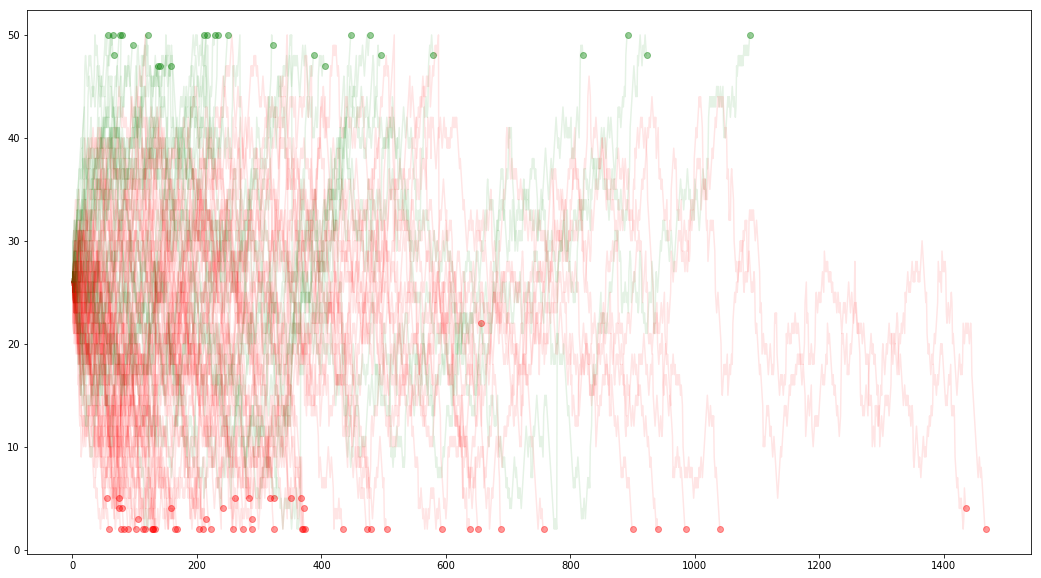

In [13]:
fig, ax = plt.subplots(figsize=(18, 10))

color_dict = {True: 'g', False: 'r'}

gb = df.groupby('game')
for name, group in itertools.islice(gb, 1000):
    num_turns = len(group)
    last_turn = group.tail(1)
    result = group['result'].iloc[0]
    
    ax.plot(range(num_turns), group['num_a'], color=color_dict[result], alpha=.1)
    ax.plot(num_turns, last_turn['num_a'], color=color_dict[result], marker='o', alpha=.4)

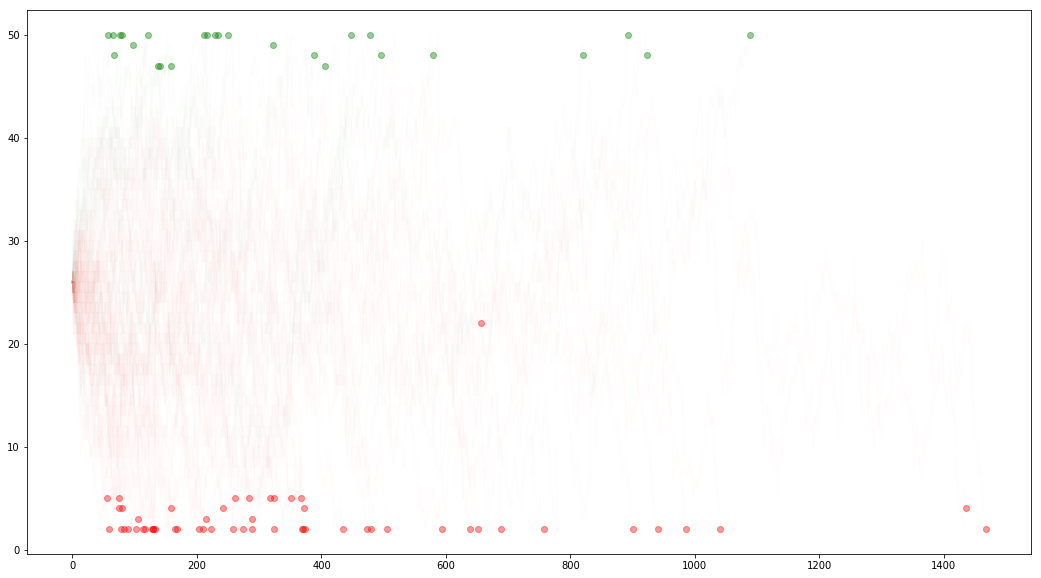

In [14]:
fig, ax = plt.subplots(figsize=(18, 10))

color_dict = {True: 'g', False: 'r'}

gb = df.groupby('game')
for name, group in gb:
    num_turns = len(group)
    last_turn = group.tail(1)
    result = group['result'].iloc[0]
    
    ax.plot(range(num_turns), group['num_a'], color=color_dict[result], alpha=.01)
    ax.plot(num_turns, last_turn['num_a'], color=color_dict[result], marker='o', alpha=.4)

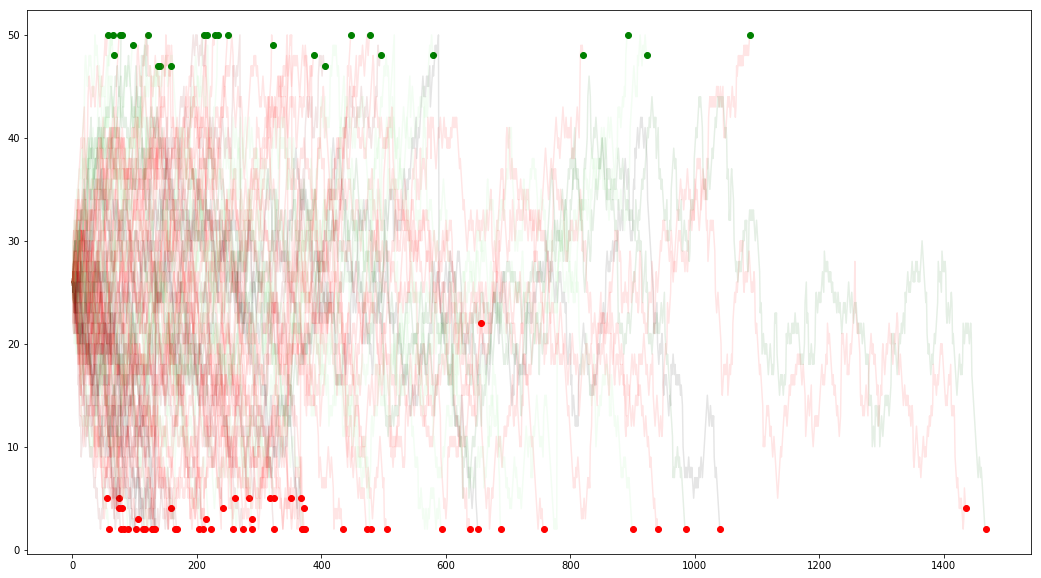

In [15]:
fig, ax = plt.subplots(figsize=(18, 10))

color_dict = {0: 'k', 1: 'darkred', 2: 'red',
              3: 'lightgreen', 4: 'darkgreen'}

win_dict = {True: 'g', False: 'r'}


gb = df.groupby('game')
for name, group in itertools.islice(gb, 100):
    num_turns = len(group)
    last_turn = group.tail(1)
    aces = group['starting_ace_count'].iloc[0]
    result = group['result'].iloc[0]
    
    ax.plot(range(num_turns), group['num_a'], color=color_dict[aces], alpha=.1)
    ax.plot(num_turns, last_turn['num_a'], color=win_dict[result], marker='o')

In [16]:
len(df.groupby('game'))

81

In [17]:
df.groupby('starting_ace_count').size()

starting_ace_count
0     2508
1     3371
2    13367
3     7680
4     2652
dtype: int64

In [18]:
(df.groupby('game').last()
   .groupby('starting_ace_count')['result'].mean())

starting_ace_count
0    0.000000
1    0.200000
2    0.323529
3    0.476190
4    0.500000
Name: result, dtype: float64

In [19]:
df.groupby('game').size().describe()

count      81.000000
mean      365.160494
std       317.964835
min        56.000000
25%       129.000000
50%       261.000000
75%       478.000000
max      1467.000000
dtype: float64

In [20]:
wins_by_starts = (df.groupby('game').last()
                    .groupby(['starting_ace_count', 'starting_king_count'])['result'].mean()).unstack()
wins_by_starts

starting_king_count,0,1,2,3,4
starting_ace_count,,,,,
0,NaN,0.00,0.000000,0.000000,NaN
1,NaN,1.00,0.000000,0.166667,1.0
2,NaN,0.00,0.266667,0.444444,0.6
3,1.0,0.25,0.500000,1.000000,NaN
4,NaN,NaN,0.500000,0.500000,NaN


In [21]:
counts_by_starts = (df.groupby('game').last()
                    .groupby(['starting_ace_count', 'starting_king_count'])['result'].size()).unstack()
counts_by_starts

starting_king_count,0,1,2,3,4
starting_ace_count,,,,,
0,NaN,1.0,4.0,2.0,NaN
1,NaN,1.0,7.0,6.0,1.0
2,NaN,5.0,15.0,9.0,5.0
3,1.0,12.0,4.0,4.0,NaN
4,NaN,NaN,2.0,2.0,NaN


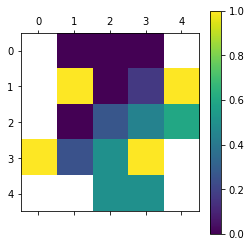

In [22]:
ax = plt.matshow(wins_by_starts.values)
plt.colorbar()

In [23]:
interesting = df[(df['starting_ace_count'] == 0) & (df['starting_king_count'] == 0)]

In [24]:
wars = interesting[interesting['wars'] == 1].index

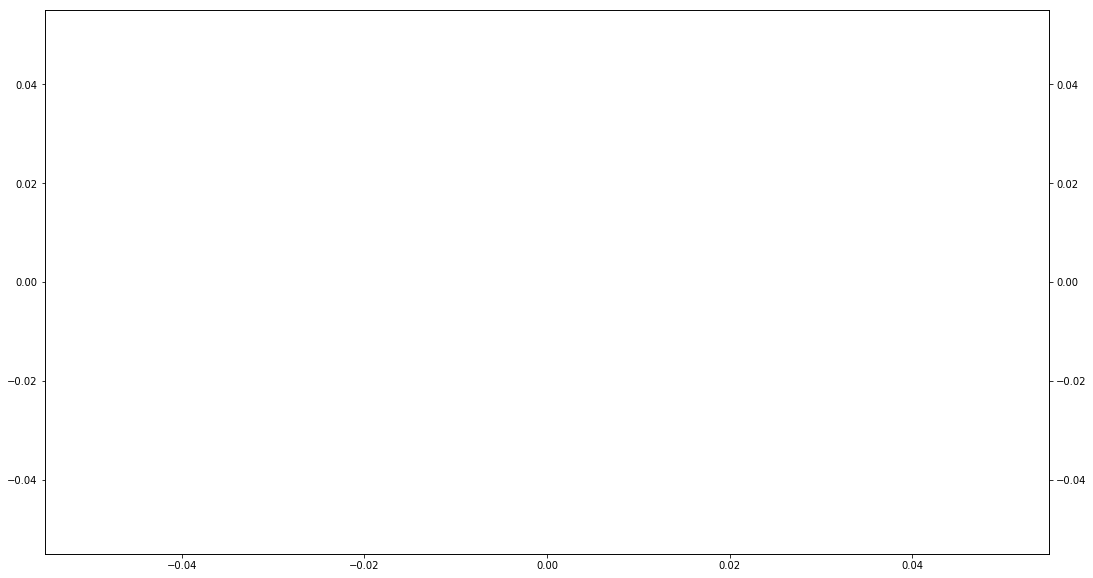

In [25]:
fig, ax = plt.subplots(figsize=(18, 10))
ax.plot(interesting['num_a'])

ax2 = ax.twinx()

ax2.plot(interesting['num_aces_a'], linewidth=3, c='g')
ax2.plot(interesting['num_kings_a'], linewidth=1, c='k')

for war in wars:
    ax.axvline(war, color='red', alpha=.5, dashes=(1, 1))